### Notebook to test out different methods for getting more of the comet prior to thresholding

Date and time  2021-07-14 15:48:13.790725
 
/home/selina/Documents/CometAnalysis/notebooks

Type of raw image file is uint8
Type of image file is float64

Number of rows 2048 of columns 2048 of pixels 4194304 and depth 1

Maximum value intensity is:  159.0

Minimum value intensity is:  5.0

max value of doubled intensities is:  318.0
min value of doubled intensities is:  10.0


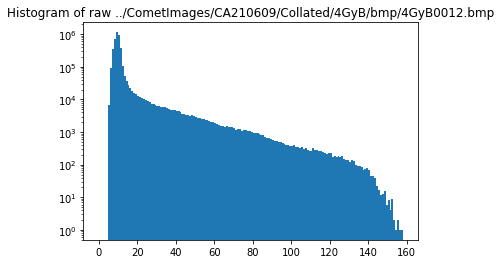

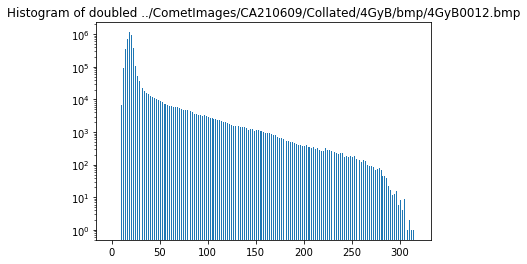

shape of doubled image is:  (2048, 2048)
 
Date and time 2021-07-14 15:48:20.362762
Time since last check is 0:00:06.572037


In [27]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
import sys
import cv2
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline
!pwd
#
# Read in images
# Numbers ***01.bmp to ...***20.bmp
#imFile = "Images\\ControlBatch\\0001.bmp"
imFile = "../CometImages/CA210609/Collated/4GyB/bmp/4GyB0012.bmp"
#
imgRaw = plt.imread(imFile)
shape = imgRaw.shape
nRows = imgRaw.shape[0] # y coordinates
nCols = imgRaw.shape[1] # x ccordinates
if len(shape) == 3:
    nDepth = imgRaw.shape[2]
else:
    nDepth = 1
imgArr = np.zeros((nRows, nCols))
imgArr[:, :] = imgRaw[:, :]
#
maxPix = np.amax(imgArr)
minPix = np.amin(imgArr)
#
print("\nType of raw image file is",imgRaw.dtype)
print("Type of image file is",imgArr.dtype)
print("\nNumber of rows",nRows,"of columns",nCols,"of pixels",nRows*nCols,"and depth",nDepth)
print("\nMaximum value intensity is: ",maxPix)
print("\nMinimum value intensity is: ",minPix)
#
thresh = [5,80]
imgThr = np.zeros((nRows, nCols))
imgThr = img > thresh[0]
#
imgDouble = imgArr * 2
maxPixDouble = np.amax(imgDouble)
minPixDouble = np.amin(imgDouble)
print("\nmax value of doubled intensities is: ", maxPixDouble)
print("min value of doubled intensities is: ", minPixDouble)
#
fig, ax = plt.subplots(1)
plt.title("Histogram of raw " + str(imFile))
n, bins, patches = ax.hist(imgRaw.flatten(), bins=np.arange(0, maxPix, 1), log=True)
plt.show()
#
fig, ax = plt.subplots(1)
plt.title("Histogram of doubled " + str(imFile))
n, bins, patches = ax.hist(imgDouble.flatten(), bins=np.arange(0, maxPixDouble, 1), log=True)
plt.show()
#
plt.imsave("double4GyB0012.bmp", imgDouble)
plt.imsave("double4GyB0012.png", imgDouble)
cv2.imwrite("cv2Double4GyB0012.bmp", imgDouble)

print("shape of doubled image is: ", imgDouble.shape)

then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

### Exploring the saved doubled image

Date and time  2021-07-14 16:26:52.419298
 

shape of imFile is:  (2048, 2048)

Max pixel value is:  255
Min pixel value is:  10


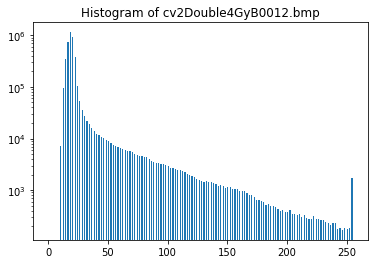


Max pixel values of halved image is:  127
Min pixel values of halved image is:  5


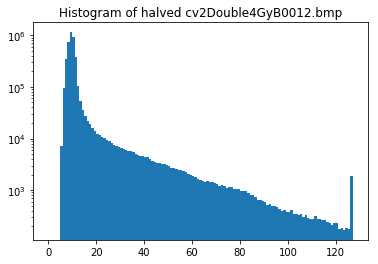

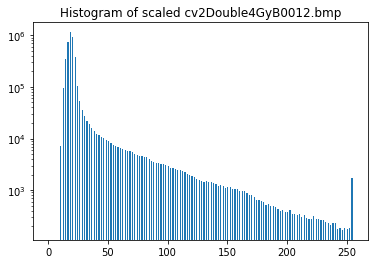

 
Date and time 2021-07-14 16:26:54.658326
Time since last check is 0:00:02.239028


In [56]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
imFile = "cv2Double4GyB0012.bmp"
#imFile = "double4GyB0012.png"  #RGBA image with very strange spectrum
imgRaw = plt.imread(imFile)
maxPix = np.amax(imgRaw)
minPix = np.amin(imgRaw)
print("\nshape of imFile is: ", imgRaw.shape)
print("\nMax pixel value is: ", maxPix)
print("Min pixel value is: ", minPix)
#
fig, ax = plt.subplots(1)
plt.title("Histogram of " + str(imFile))
n, bins, patches = ax.hist(imgRaw.flatten(), bins=np.arange(0, maxPix+1, 1), log=True)
plt.show()
#
imgHalved = imgRaw // 2
maxPixHalved = np.amax(imgHalved)
print("\nMax pixel values of halved image is: ", np.amax(imgHalved))
print("Min pixel values of halved image is: ", np.amin(imgHalved))
#
imgScaled = imgHalved * (255/np.amax(imgHalved))
#
#plot spectrum of image just after halving and after rescaling to fit 0-255 range
fig, ax = plt.subplots(1)
plt.title("Histogram of halved " + str(imFile))
n, bins, patches = ax.hist(imgHalved.flatten(), bins=np.arange(0, maxPixHalved+1, 1), log=True)
plt.show()
fig, ax = plt.subplots(1)
plt.title("Histogram of scaled " + str(imFile))
n, bins, patches = ax.hist(imgScaled.flatten(), bins=np.arange(0, 256, 1), log=True)
plt.show()
#
#save scaled image to analyse
cv2.imwrite("scaled4GyB0012.bmp", imgScaled)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Explore scaled image

Date and time  2021-07-14 17:03:17.874441
 

shape of imRaw is:  (2048, 2048)

Max pixel value is:  255
Min pixel value is:  10


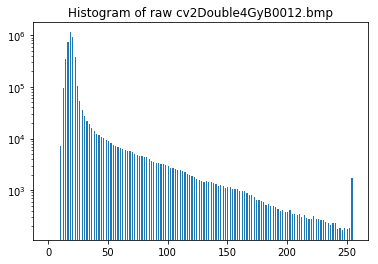

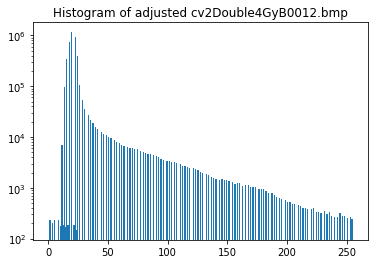

 
Date and time 2021-07-14 17:03:19.474191
Time since last check is 0:00:01.599750


In [72]:
import numpy as np
from skimage import exposure
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
print(" ")
#
#imFile = "../CometImages/CA210609/Collated/4GyB/bmp/4GyB0012.bmp"
imFile = "cv2Double4GyB0012.bmp" 
imgRaw = plt.imread(imFile)
maxPix = np.amax(imgRaw)
minPix = np.amin(imgRaw)
print("\nshape of imRaw is: ", imgRaw.shape)
print("\nMax pixel value is: ", maxPix)
print("Min pixel value is: ", minPix)
fig, ax = plt.subplots(1)
plt.title("Histogram of raw " + str(imFile))
n, bins, patches = ax.hist(imgRaw.flatten(), bins=np.arange(0, maxPix+1, 1), log=True)
plt.show()
#
# use skimage.exposure modeule's adjust_gamma function
imgAdjusted = exposure.adjust_gamma(imgRaw, gamma = 1, gain=1.1)
maxPixAdjusted = np.amax(imgAdjusted)
fig, ax = plt.subplots(1)
plt.title("Histogram of adjusted " + str(imFile))
n, bins, patches = ax.hist(imgAdjusted.flatten(), bins=np.arange(0, maxPixAdjusted+1, 1), log=True)
plt.show()

#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))